### CIS 4360 Bond Math Examples

### Instructor Alex Pang

In [4]:
import math
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import math

##### Effect of the compounding frequency on the value of $100 at the end of 1 year for a given interest rate per annum

Remember the formula from the class presentation
$$ A (1+R)^n $$

If the rate is compounded m times per year, then the terminal value after T years will be 
$$ A (1+\frac{R}{m})^{mT}$$

Converting between different periodicity, m and n
$$ ( 1+ \frac{R_m}{m})^m = (1+\frac{R_n}{n})^n $$

**Example: Table 4.1 in Chapter 4**

![table4.1](./table4.1.png)

In [5]:
# define Principal and R
A = 100
R = 0.1

In [6]:
for m in [1, 2, 4, 12, 52, 365,720,1200]:
    FV = A * math.pow( 1 + R/m, m)
    print(m, round(FV, 5))

1 110.0
2 110.25
4 110.38129
12 110.47131
52 110.50648
365 110.51558
720 110.51632
1200 110.51663


In [7]:
# Continous Compounding
FV = A*math.exp(R)
print(FV)

110.51709180756477


# What about after 2 years?

In [8]:
n = 2
for m in [1, 2, 4, 12, 52, 365, 720, 1200]:
    FV = A * math.pow( 1 + R/m, m * n)
    print(m, round(FV, 5))
# continous
print("continous", A*math.exp(R*2))

1 121.0
2 121.55063
4 121.84029
12 122.0391
52 122.11682
365 122.13693
720 122.13858
1200 122.13926
continous 122.14027581601698


**Example What is the equivalent quarterly compound interest rate of a semi-annual rate of 5%?**

In [9]:
I = math.pow(1 + 0.05/2, 2)
R = 4 * ( math.pow(I, 1/4)-1)
print(R*100)

4.969134626331773


##### Continuous Equivalence Rate
$$ A e^{R_c T} = A ( 1 + \frac{R_m}{m})^{mT} $$

**Example 4.1 of the textbook:
Consider an interest rate that is quoted as 10% per annum with semiannual compounding. What is the equivalent rate with continous compounding**

In [10]:
R = 2 * np.log(1+ 0.1/2)
print(R*100)

9.758032833886409


##### Discount Factor using continous compounding
$$ PV = d * FV = e^{-R t} FV $$

**Example**
Consider a 5% continous compounding rate environment, how much does $100 in 2 years worth today?

In [11]:
FV = 100
R = 0.05
t = 2

In [12]:
PV = math.exp(-1 * R * t)*FV

In [13]:
print(PV)

90.48374180359595


In [14]:
discount_factor = PV/FV

In [15]:
print(discount_factor)

0.9048374180359595


**Discount Factor is always less than 1**

In [16]:
periods = [n*0.25 for n in range(600)]
discount_curve = [ math.exp(-R*t) for t in periods]
print(periods[:10])
print(discount_curve[:10])

[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
[1.0, 0.9875778004938814, 0.9753099120283326, 0.9631944177208218, 0.951229424500714, 0.9394130628134758, 0.9277434863285529, 0.9162188716508776, 0.9048374180359595, 0.8935973471085157]


<AxesSubplot:>

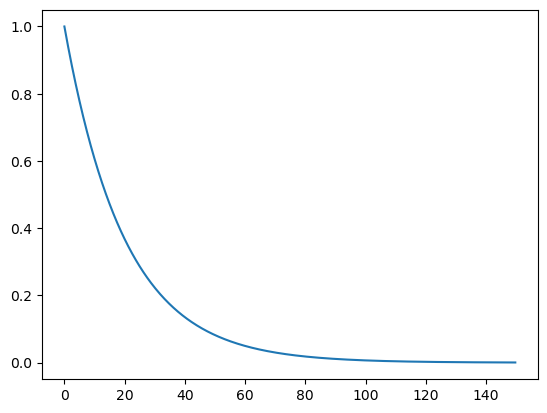

In [17]:
sns.lineplot(x=periods, y=discount_curve)

**Example 2: Calculate a 10-year bond with annual 5% coupon paid annual if the interest rate is 6% for any maturity date**

In [18]:
C = 0.05
B = 1000
y = 0.06
N = 10

CF = [B * C for i in range(1, N+1)]
t  = [i for i in range(1, N+1)]

print(CF)
print(t)
print(len(t))

[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10


In [19]:
DF =[ 1/math.pow(1+y, i) for i in range(1, N + 1)]
print(DF)

[0.9433962264150942, 0.8899964400142398, 0.8396192830323018, 0.7920936632380204, 0.747258172866057, 0.7049605404396764, 0.6650571136223361, 0.6274123713418265, 0.591898463530025, 0.5583947769151179]


In [20]:
PVs = [ CF[i]*DF[i] for i in range(len(CF))]
print(PVs)

[47.16981132075471, 44.499822000711994, 41.98096415161509, 39.60468316190102, 37.36290864330285, 35.248027021983816, 33.252855681116806, 31.370618567091324, 29.594923176501247, 27.919738845755894]


In [21]:
PV_coupon = sum(PVs)

In [22]:
PV = PV_coupon + B * DF[-1]
print(PV)

926.3991294858527


**Example 3: Calculate a 2-year Treasury bond with 8% coupon paid semi-annually if the interest rate is 6% for any maturity date**

In [23]:
C = 0.08
B = 10000
y = 0.06
N = 2

CF = [B * C/2 for i in range(1, 2*N+1)]
t  = [i * 0.5 for i in range(1,2*N+1)]

print(CF)
print(t)
print(len(t))

[400.0, 400.0, 400.0, 400.0]
[0.5, 1.0, 1.5, 2.0]
4


In [24]:
#DF = [math.exp(-1*y*i) for i in range(1,2*N+1)]
DF =[ 1/math.pow(1+y/2, i) for i in range(1, 2 * N + 1)]
print(DF)

[0.970873786407767, 0.9425959091337544, 0.9151416593531596, 0.8884870479156888]


In [25]:
PVs = [ CF[i]*DF[i] for i in range(len(CF))]
print(PVs)

[388.3495145631068, 377.03836365350173, 366.05666374126383, 355.3948191662755]


In [26]:
PV_coupon = sum(PVs)

In [27]:
PV = PV_coupon + B * DF[-1]

In [28]:
print(PV)

10371.709840281035


**Example 4: Calculate Price of a 5 year bond with 5% interest paid semi-annually at 4.17% yield**

In [29]:
C = 0.05
B = 100
y = 0.04168908
N = 5

CF = [B * C/2 for i in range(1, 2*N+1)]
t  = [i * 0.5 for i in range(1,2*N+1)]
DF = [ 1/math.pow(1+y/2, i) for i in range(1, 2 * N + 1)]
PVs = [ CF[i]*DF[i] for i in range(len(CF))]
PV = sum(PVs) + B * DF[-1]
print(100*PV/B)

103.71623730023047


##### Bond Price as a function of the discount rate

In [30]:
def treasury_bond_price(coupon, yld, n_year):
    B = 100
    CF = [B * coupon/2 for i in range(1, 2*n_year+1)]
    DF = [ 1/math.pow(1+yld/2, i) for i in range(1, 2 * n_year + 1)]
    PVs = [ CF[i]*DF[i] for i in range(len(CF))]
    PV = sum(PVs) + B * DF[-1]
    return(100*PV/B)

In [31]:
print(treasury_bond_price(0.05, 0.0417, 5))

103.71124861191802


In [32]:
coupon = 0.05
n_year = 10
ylds = [0.1 * i / 100  for i in range(200)]
prices = [treasury_bond_price(coupon, yld, n_year) for yld in ylds]

<AxesSubplot:>

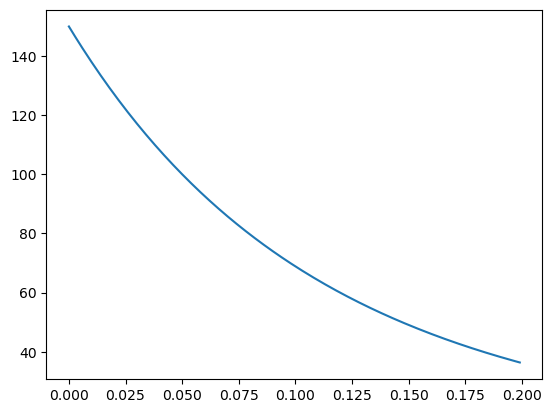

In [33]:
sns.lineplot(x=ylds, y=prices)

**So as interest rate (yields or discount rate) increase, bond price decrease**

# Day Count

In [34]:
def get_actual360_daycount_frac(start, end):
    day_in_year = 360
    day_count = (end - start).days
    return(day_count / day_in_year)

In [35]:
def get_30360_daycount_frac(start, end):
    day_in_year = 360
    day_count = 360*(end.year - start.year) + 30*(end.month - start.month - 1) + \
                max(0, 30 - start.day) + min(30, end.day)
    return(day_count / day_in_year )

In [36]:
d1 = datetime.date(2010, 2, 28)
d2 = datetime.date(2011, 3, 5)

nday = get_30360_daycount_frac(d1, d2) * 360
print(nday)

367.0


In [37]:
import calendar
def get_actualactual_daycount_frac(start_date, end_date):
    # leave it as exercise
    pass  

In [38]:
# example from the book section 6.1
coupon = 0.08
principal = 100
start_date = datetime.date(2009, 3, 1)
end_date = datetime.date(2009, 7, 3)

# Corporate bond using 30/360
interest_earns = principal * coupon * get_30360_daycount_frac(start_date, end_date)
print(interest_earns)

2.7111111111111112


# Forward Rate

### Example Table 4.6

![table4.6](./table4.6.png)

In [39]:
T1 = 1
T2 = 2
T3 = 3
T4 = 4
T5 = 5
R1 = 3.0
R2 = 4.0
R3 = 4.6
R4 = 5.0
R5 = 5.3

In [40]:
X = math.exp(R2*T2)/math.exp(R1*T1)
R12 = math.log(X)/(T2-T1)
print(R12)

5.0


In [41]:
X = math.exp(R3*T3)/math.exp(R2*T2)
R23 = math.log(X)/(T3-T2)
print(R23)

5.799999999999999


In [42]:
X = math.exp(R4*T4)/math.exp(R3*T3)
R34 = math.log(X)/(T4-T3)
print(R34)

6.200000000000001


## Bootstrap (section 4.7 of Hull)

![table4.3](./table4.3.png)

![table4.4](./table4.4.png)

In [43]:
# 100 = 99.6 exp(R * 0.25)
# 100 = 99 exp(R * 0.5)
R_3m = 100 * math.log(100/99.6) / 0.25
R_6m = 100 * math.log(100/99) / 0.5
R_12m = 100 * math.log(100/97.8)

In [44]:
print(R_3m, R_6m, R_12m)

1.6032085590155472 2.0100671707003013 2.2245608947319737


In [45]:
# Now consider the 4th bond (1.5 years), CF are 6months: $2, 1 year $2, 1.5 year: 102
# we can set up an equation to solve the R_18m rate
# 2 * exp(-R_6m * 0.5) + 2 exp(-R_12m * 1.0) + 102 exp(-R * 1.5 ) = 102.5

X = (102.5 - 2 * math.exp(-R_6m * 0.5/100) - 2 * math.exp(-R_12m/100))/102
print(X)
R_18m = - 100*math.log(X) / 1.5
print(R_18m)

0.966313725490196
2.2844486604668135


In [46]:
# Now consider the fifth bond to solve for the rate for 2 years
from math import exp, log

In [47]:
X = (105 - 2.5*exp(-R_6m * 0.5/100) - 2.5 * exp(-R_12m/100) - 2.5 *exp(-R_18m *1.5/100))/102.5
R_24m = - 100 * log(X)/2
print(R_24m)

2.416378695338805


In [48]:
# Thus we have verified Table 4.4

In [49]:
# exp(RT) = 1/(1+y/2)^2